<a href="https://colab.research.google.com/github/robyvanzetta/NLP-Project/blob/main/Toxic_Comments_Classification_Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toxic Comments Classification Dataset - Classification

Dataset is provided by [kaggle.com](https://www.kaggle.com)

https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

## Description
The Toxic Comments Classification Dataset consists of a large number of Wikipedia comments which have been labeled by human raters for toxic behavior.

The dataset has been provided by the Conversation AI team, a research initiative founded by Jigsaw and Google (both a part of Alphabet) that are working on tools to help improve online conversation. One area of focus is the study of negative online behaviors, like toxic comments (i.e. comments that are rude, disrespectful or otherwise likely to make someone leave a discussion).

The dataset has been published as part of a Kaggle Challenge, which asked data scientists to build a multi-headed model that’s capable of detecting different types of of toxicity like threats, obscenity, insults, and identity-based hate better than AI Team’s current models.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')


train = '/content/drive/MyDrive/Università/NLP/train.csv'
test = '/content/drive/MyDrive/Università/NLP/test.csv'
test_labels = '/content/drive/MyDrive/Università/NLP/test_labels.csv'
sample_submission = '/content/drive/MyDrive/Università/NLP/sample_submission.csv'

test_size = 0.25
random_state = 42

text = 'comment_text'
target = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [3]:
df = pd.read_csv(train)
df_test = pd.read_csv(test)
df_test_labels = pd.read_csv(test_labels)
df_sample_submission = pd.read_csv(sample_submission)

In [3]:
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
df.head()

The dataset has 159571 rows and 8 columns


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


,0
id,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [6]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


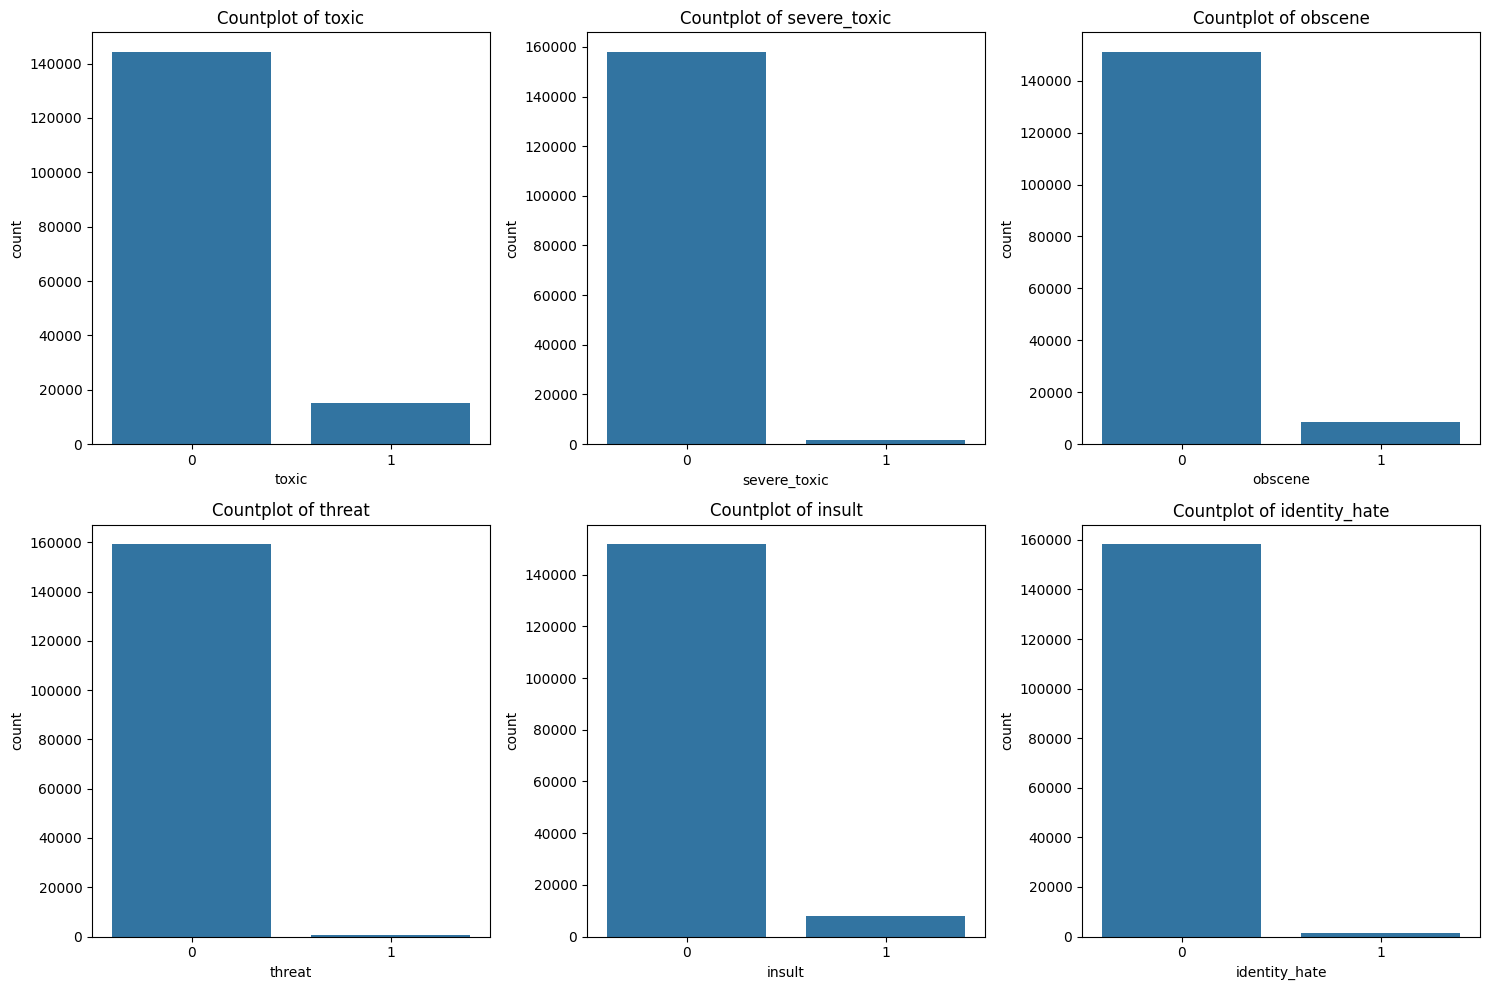

In [4]:
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

plt.figure(figsize=(15, 10))

for col in numerical_cols:
    plt.subplot(2, 3, df.select_dtypes(include=np.number).columns.get_loc(col) + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')

plt.tight_layout()
plt.show()


## TF-IDF

In [5]:
# Import libraries for TF-IDF
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.utils.class_weight import compute_sample_weight

In [6]:
X = df[text]
y = df['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(119678,) (119678,)
(39893,) (39893,)


In [7]:
# TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [11]:
# Define models (without class_weight)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
clf_configs = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Linear SVC': LinearSVC()
}

reports = {}
y_preds = {}

# Train each model using the sample weights
for name, clf in clf_configs.items():
    # Fit with sample weights if supported
    if name in ['Logistic Regression', 'Linear SVC']:
        clf.fit(X_train_tfidf, y_train, sample_weight=sample_weights)
    else:
        # MultinomialNB does not support sample_weight with sparse input directly in older versions
        clf.fit(X_train_tfidf, y_train)  # fallback, or use custom handling
    y_pred = clf.predict(X_test_tfidf)
    y_preds[name] = y_pred
    reports[name] = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Print classification reports
for name in clf_configs:
    print(f'=== {name} ===')
    print(classification_report(y_test, y_preds[name], zero_division=0))
    print('\n')

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     36078
           1       0.60      0.86      0.71      3815

    accuracy                           0.93     39893
   macro avg       0.79      0.90      0.83     39893
weighted avg       0.95      0.93      0.94     39893



=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     36078
           1       0.93      0.51      0.66      3815

    accuracy                           0.95     39893
   macro avg       0.94      0.75      0.81     39893
weighted avg       0.95      0.95      0.94     39893



=== Linear SVC ===
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     36078
           1       0.59      0.84      0.69      3815

    accuracy                           0.93     39893
   macro avg       0.79      0.89      0.83     39893
wei

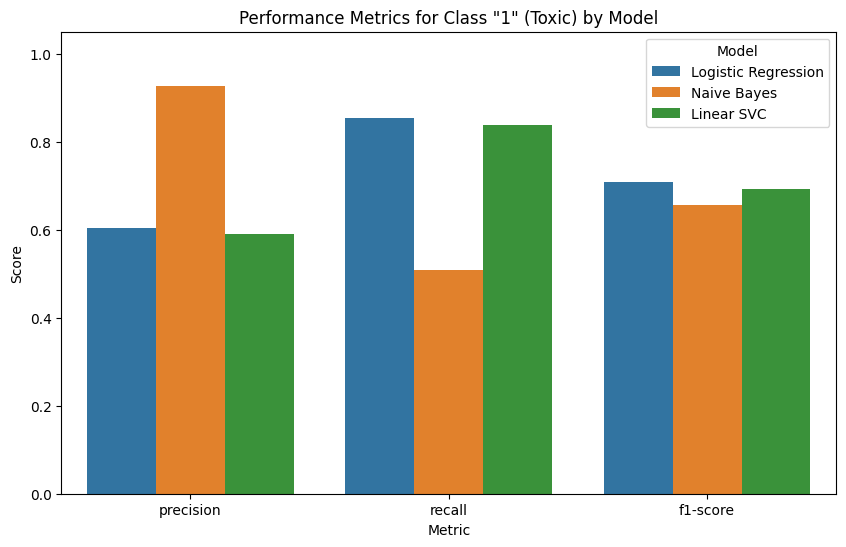

In [12]:
# Build a list of evaluation metrics for each model, excluding 'support'
data = []
for name, report in reports.items():
    for label, metrics in report.items():
        if label not in ['0', '1']:  # Only consider actual class labels (binary classification)
            continue
        for metric, score in metrics.items():
            if metric == 'support':  # Exclude 'support' (just a count, not a performance metric)
                continue
            data.append([name, label, metric, score])

# Create a DataFrame with metrics
df_metrics = pd.DataFrame(data, columns=['Model', 'Label', 'Metric', 'Score'])

# Filter to only include class "1" (toxic comments)
df_class1 = df_metrics[df_metrics['Label'] == '1']

# Plot the performance metrics (Precision, Recall, F1-score) for each model on class "1"
plt.figure(figsize=(10, 6))
sns.barplot(data=df_class1, x='Metric', y='Score', hue='Model', errorbar=None)
plt.title('Performance Metrics for Class "1" (Toxic) by Model')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.show()

## Neural Networks

In [13]:
#Import libraries for Neural Networks
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
# Reduce dataset to 5% for faster training (adjust as needed)
df_subset = df.sample(frac=0.05, random_state=42)

# Re-tokenize and reprocess this smaller dataset
#X = df_subset[text]
#y = df_subset[target].values

In [30]:
# Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['comment_text'])

# Sequences
sequences = tokenizer.texts_to_sequences(df['comment_text'])

# Padding
max_length = 100
X = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Target: multi-label (6 columns)
y = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1

In [31]:
def load_glove_embedding_matrix(word_index, embed_dim):
    """Load Glove embeddings.

    """
    !wget http://nlp.stanford.edu/data/glove.6B.zip
    !unzip glove*.zip

    path = 'glove.6B.100d.txt'

    embeddings_index = {}
    with open(path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    print('Found %s word vectors.' % len(embeddings_index))
    embedding_matrix = np.zeros((len(word_index) + 1, embed_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

In [17]:
USE_GLOVE=True
glove_matrix=None
if USE_GLOVE:
    embedding_dim = 100
    glove_matrix = load_glove_embedding_matrix(tokenizer.word_index, embedding_dim)

--2025-05-13 06:35:15--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-13 06:35:15--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-13 06:35:15--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [32]:
# Build the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(6, activation='sigmoid'))  # 6 outputs for multi-label

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    callbacks=[early_stop],
    verbose=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1596/1596 - 54s - 34ms/step - accuracy: 0.9746 - loss: 0.1135 - val_accuracy: 0.9943 - val_loss: 0.0619
Epoch 2/20
1596/1596 - 81s - 51ms/step - accuracy: 0.9941 - loss: 0.0557 - val_accuracy: 0.9943 - val_loss: 0.0527
Epoch 3/20
1596/1596 - 82s - 51ms/step - accuracy: 0.9941 - loss: 0.0491 - val_accuracy: 0.9943 - val_loss: 0.0519
Epoch 4/20
1596/1596 - 82s - 51ms/step - accuracy: 0.9941 - loss: 0.0450 - val_accuracy: 0.9943 - val_loss: 0.0528
Epoch 5/20
1596/1596 - 47s - 29ms/step - accuracy: 0.9941 - loss: 0.0420 - val_accuracy: 0.9943 - val_loss: 0.0545


In [33]:
# Predict probabilities on test set
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary predictions (threshold = 0.5)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Store classification reports in dictionary per class
classification_report_nn = {}
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Generate report for each label
for i, label in enumerate(labels):
    report = classification_report(y_test[:, i], y_pred_classes[:, i], output_dict=True)
    classification_report_nn[label] = report

# Print classification reports
for label, report in classification_report_nn.items():
    print(f'\n=== Classification Report for {label} ===')
    df_report = pd.DataFrame(report).T
    print(df_report)

998/998 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step

=== Classification Report for toxic ===
              precision    recall  f1-score       support
0              0.972145  0.986833  0.979434  28859.000000
1              0.854962  0.732984  0.789288   3056.000000
accuracy       0.962525  0.962525  0.962525      0.962525
macro avg      0.913554  0.859908  0.884361  31915.000000
weighted avg   0.960925  0.962525  0.961227  31915.000000

=== Classification Report for severe_toxic ===
              precision    recall  f1-score       support
0              0.990528  0.999620  0.995053  31594.000000
1              0.612903  0.059190  0.107955    321.000000
accuracy       0.990161  0.990161  0.990161      0.990161
macro avg      0.801716  0.529405  0.551504  31915.000000
weighted avg   0.986730  0.990161  0.986131  31915.000000

=== Classification Report for obscene ===
              precision    recall  f1-score       support
0              0.984289  0.993709  0.988977  30200.000000
1              

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

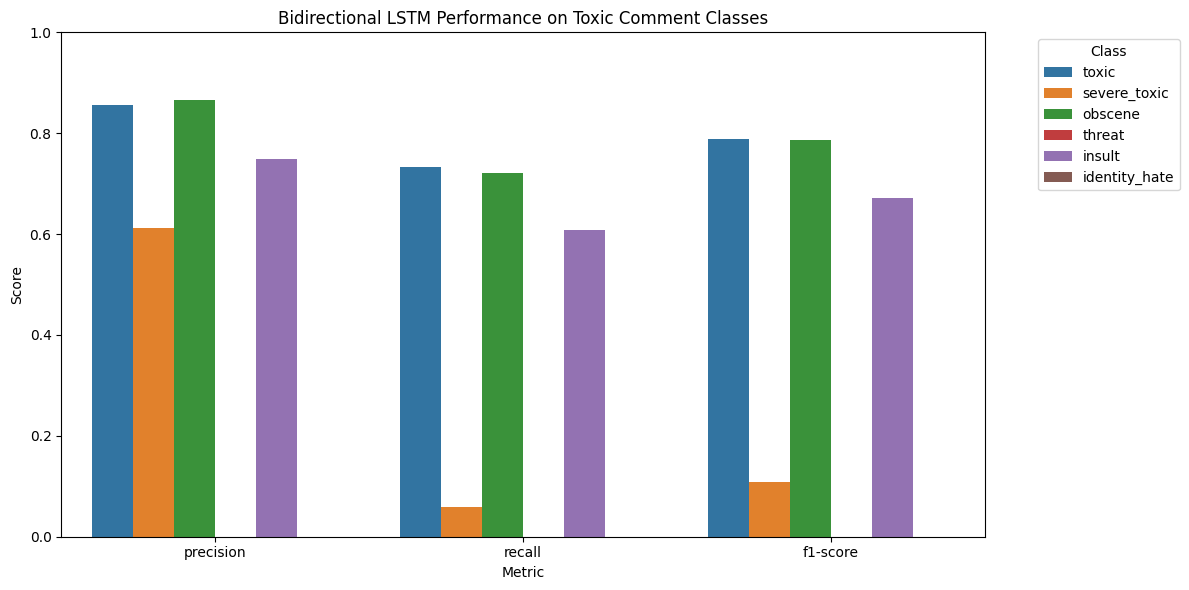

In [34]:
# 📊 Create plot data from classification report
plot_data = []

for label, report in classification_report_nn.items():
    if '1' in report:
        for metric in ['precision', 'recall', 'f1-score']:
            score = report['1'][metric]
            plot_data.append([label, metric, score])

# Build DataFrame
df_plot = pd.DataFrame(plot_data, columns=['Class', 'Metric', 'Score'])

# Barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='Metric', y='Score', hue='Class')
plt.title('Bidirectional LSTM Performance on Toxic Comment Classes')
plt.ylim(0, 1)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Transformers BERT

Map:   0%|          | 0/119678 [00:00<?, ? examples/s]

Map:   0%|          | 0/39893 [00:00<?, ? examples/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/2
7480/7480 [==============================] - 1766s 233ms/step - loss: 0.0532 - accuracy: 0.9873 - val_loss: 0.0468 - val_accuracy: 0.9939
Epoch 2/2
2494/2494 [==============================] - 183s 73ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

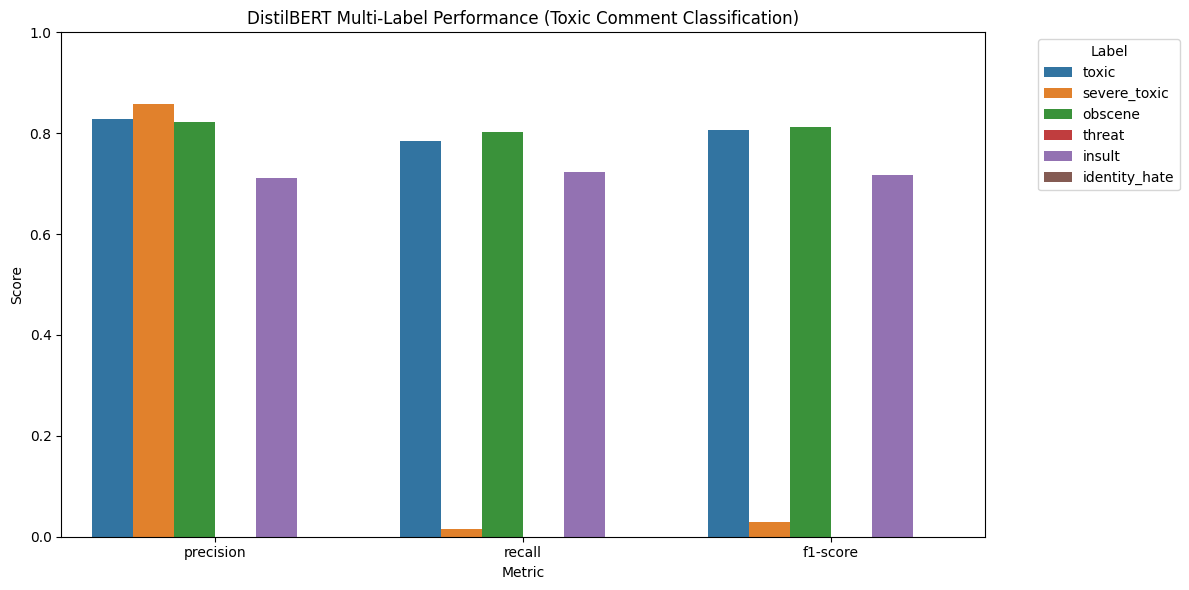

In [41]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification, DataCollatorWithPadding
from datasets import Dataset
import tensorflow as tf
from transformers import create_optimizer

optimizer, _ = create_optimizer(init_lr=5e-5, num_train_steps=1000, num_warmup_steps=100)

# Build TensorFlow Datasets
tf_train = tf.data.Dataset.from_tensor_slices((
    dict(input_ids=X_train_enc['input_ids'], attention_mask=X_train_enc['attention_mask']),
    y_train_enc
)).shuffle(1000).batch(16)

tf_test = tf.data.Dataset.from_tensor_slices((
    dict(input_ids=X_test_enc['input_ids'], attention_mask=X_test_enc['attention_mask']),
    y_test_enc
)).batch(16)

# Define multi-label target columns
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Prepare Hugging Face datasets
train_df = pd.DataFrame({'text': X_train})
train_df[label_cols] = y_train
test_df = pd.DataFrame({'text': X_test})
test_df[label_cols] = y_test

train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

# Load tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenization function
def tokenize(example):
    return tokenizer(example['text'], truncation=True, padding='max_length', max_length=128)

# Apply tokenization
train_ds = train_ds.map(tokenize, batched=True)
test_ds = test_ds.map(tokenize, batched=True)

# Set format for TensorFlow
train_ds.set_format(type='tensorflow', columns=['input_ids', 'attention_mask'] + label_cols)
test_ds.set_format(type='tensorflow', columns=['input_ids', 'attention_mask'] + label_cols)

# Data collator for dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors='tf')

# Convert HuggingFace datasets back to pandas
train_df = train_ds.to_pandas()
test_df = test_ds.to_pandas()

# Extract inputs and labels
X_train_enc = tokenizer(list(train_df['text']), padding='max_length', truncation=True, max_length=128, return_tensors='np')
X_test_enc = tokenizer(list(test_df['text']), padding='max_length', truncation=True, max_length=128, return_tensors='np')

y_train_enc = train_df[label_cols].values.astype('float32')
y_test_enc = test_df[label_cols].values.astype('float32')

# Build TensorFlow Datasets
tf_train = tf.data.Dataset.from_tensor_slices((
    dict(input_ids=X_train_enc['input_ids'], attention_mask=X_train_enc['attention_mask']),
    y_train_enc
)).shuffle(1000).batch(16)

tf_test = tf.data.Dataset.from_tensor_slices((
    dict(input_ids=X_test_enc['input_ids'], attention_mask=X_test_enc['attention_mask']),
    y_test_enc
)).batch(16)


# Load model with 6 output labels for multi-label classification
model = TFDistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=6,
    problem_type='multi_label_classification'
)

# Compile with binary cross-entropy loss for multi-label
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
model.fit(tf_train, validation_data=tf_test, epochs=2)

# Predict on test set
y_pred_logits = model.predict(tf_test).logits
y_pred = tf.math.sigmoid(y_pred_logits).numpy()
y_pred_bin = (y_pred > 0.5).astype(int)

# Evaluate and store classification reports
classification_report_bert = {}
for i, label in enumerate(label_cols):
    report = classification_report(y_test[:, i], y_pred_bin[:, i], output_dict=True)
    classification_report_bert[label] = report

# Plot: metrics for each class
data = []
for label, report in classification_report_bert.items():
    for metric in ['precision', 'recall', 'f1-score']:
        score = report['1'][metric]
        data.append([label, metric, score])

df_plot = pd.DataFrame(data, columns=['Label', 'Metric', 'Score'])

plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='Metric', y='Score', hue='Label')
plt.title('DistilBERT Multi-Label Performance (Toxic Comment Classification)')
plt.ylim(0, 1)
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()